# Non - Linear Transformations
***
Compares the reconstruction ability of Principal Component Analysis and Autoencoder
***
### Import Packages

In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np

***
### Helper Functions

In [7]:
def build_model(data_matrix, n_dim):
    
    input_layer = Input(shape=(n_dim,))
    layer_1 = Dense(16, activation='linear')(input_layer)
    layer_2 = Dense(8, activation='linear')(layer_1)
    encode = Dense(1, activation='sigmoid')(layer_2)
    layer_3 = Dense(8, activation='linear')(encode)
    layer_4 = Dense(16, activation='linear')(layer_3)
    output = Dense(n_dim, activation='sigmoid')(layer_4)
    
    autoencoder = Model(input_layer, output)
    autoencoder.compile(optimizer='adam',
                        loss='mse')
    autoencoder.fit(data_matrix[:900], data_matrix[:900],
                    epochs=50, batch_size=128,
                    validation_data=(data_matrix[900:], data_matrix[900:]))
    recon = autoencoder.predict(data_matrix)
    
    return autoencoder, recon

def standardise(matrix):
    input_dim = matrix.shape[1]
    for i in range(matrix.shape[1]):
        matrix[:, i] = (matrix[:,i] - matrix[:, i].min()) / (matrix[:, i].max() - matrix[:, i].min())
    return matrix

def pca_model(data_matrix, n_dim):
    pca = PCA(n_components=n_dim)
    pca.fit(data_matrix)
    tr_data = pca.transform(data_matrix)
    reconstructed = pca.inverse_transform(tr_data)
    cost = np.mean(np.power(reconstructed - data_matrix, 2), axis=1)
    cost = cost.reshape(-1,1)
    return tr_data, reconstructed, cost

def plots(og_matrix, recon_matrix_pca, recon_matrix_ac):
    sns.set_style('darkgrid')
    
    plt.figure(figsize=(5,4))
    plt.plot(og_matrix[:,0], og_matrix[:,1], marker='o')

    plt.figure(figsize=(5,4))
    plt.plot(recon_matrix_pca[:,0], recon_matrix_pca[:,1], marker='o')
    plt.show()
    
    plt.figure(figsize=(5,4))
    plt.plot(recon_matrix_ac[:,0], recon_matrix_ac[:,1], marker='o')
    plt.show()

***
### Generate Data

In [4]:
"""
Equation : 4x^2 + 10
"""

m = 4
c = 10
matrix = np.empty((1000, 2))
matrix[:,0] = np.linspace(0,1000,1000) #generate 1000 data points between 0 and 1000
matrix[:,1] = m*(matrix[:,0]**2) + c
data_matrix = standardise(matrix)

***
### Fit the data to the models

In [5]:
tr_data, recon_pca, mse = pca_model(data_matrix, 1) # reconstruction PCA
autoencoder, recon_ac = build_model(data_matrix, data_matrix.shape[1]) # reconstruction Autoencoder

Train on 900 samples, validate on 100 samples
Epoch 1/50
900/900 [==============================] - 0s 488us/sample - loss: 0.0868 - val_loss: 0.2053
Epoch 2/50
900/900 [==============================] - 0s 19us/sample - loss: 0.0799 - val_loss: 0.2251
Epoch 3/50
900/900 [==============================] - 0s 18us/sample - loss: 0.0748 - val_loss: 0.2513
Epoch 4/50
900/900 [==============================] - 0s 24us/sample - loss: 0.0708 - val_loss: 0.2728
Epoch 5/50
900/900 [==============================] - 0s 20us/sample - loss: 0.0687 - val_loss: 0.2889
Epoch 6/50
900/900 [==============================] - 0s 22us/sample - loss: 0.0673 - val_loss: 0.3033
Epoch 7/50
900/900 [==============================] - 0s 21us/sample - loss: 0.0664 - val_loss: 0.3152
Epoch 8/50
900/900 [==============================] - 0s 25us/sample - loss: 0.0657 - val_loss: 0.3242
Epoch 9/50
900/900 [==============================] - 0s 24us/sample - loss: 0.0651 - val_loss: 0.3283
Epoch 10/50
900/900 [=====

***
### Plot the reconstructions

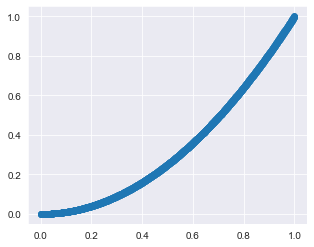

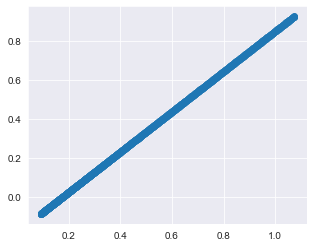

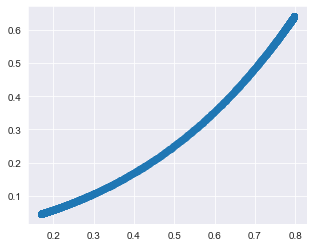

In [8]:
plots(data_matrix, recon_pca, recon_ac)

***
### Model Summary

In [9]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 16)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 34    

In [12]:
print('MSE for PCA reconstruction :', np.mean(mse))

MSE for PCA reconstruction : 0.0013711705649795737


In [14]:
print('MSE for Autoencoder reconstruction :', np.mean(autoencoder.history.history['loss']))

MSE for Autoencoder reconstruction : 0.03150823250182697
